In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
!pip install yfinance

In [65]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Step 1: Setup and Data Retrieval
# Define the stock ticker and the date range
stock_ticker = "AAPL"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2025-06-25"

In [67]:
# Retrieve historical stock data
data = yf.download(stock_ticker, start=start_date, end=end_date)

# Display the first 5 rows of data
print("First 5 rows of stock data:")
print(data.head())

/tmp/ipython-input-2949359386.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

First 5 rows of stock data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487846  72.526533  70.783248  71.034709  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307533  73.609768  71.849555  71.849555  132079200


In [68]:
# Step 2: Data Exploration
# Calculate the highest and lowest stock price
highest_price = data["High"].max()
lowest_price = data["Low"].min()

print(f"Highest Stock Price: {highest_price}")
print(f"Lowest Stock Price: {lowest_price}")

Highest Stock Price: Ticker
AAPL    259.474086
dtype: float64
Lowest Stock Price: Ticker
AAPL    51.528419
dtype: float64


In [69]:
# Add a 'Year' column for yearly calculations
data["Year"] = data.index.year
average_closing_price = data.groupby("Year")["Close"].mean()

print("Average Closing Price per Year:")
print(average_closing_price)

Average Closing Price per Year:
Price        Close
Ticker        AAPL
Year              
2020     92.715398
2021    138.013087
2022    152.407696
2023    170.869810
2024    206.272488
2025    216.782597


In [70]:
# Add a 'Month' column for monthly calculations
data["Month"] = data.index.to_period("M")
monthly_avg_volume = data.groupby("Month")["Volume"].mean()

print("Monthly Average Volume of Shares Traded:")
print(monthly_avg_volume)

Monthly Average Volume of Shares Traded:
Price          Volume
Ticker           AAPL
Month                
2020-01  1.397319e+08
2020-02  1.589094e+08
2020-03  2.854578e+08
2020-04  1.554904e+08
2020-05  1.402968e+08
...               ...
2025-02  4.538275e+07
2025-03  5.310664e+07
2025-04  7.653898e+07
2025-05  5.693944e+07
2025-06  5.281144e+07

[66 rows x 1 columns]


In [71]:
print(data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
Year              0
Month             0
dtype: int64


In [72]:
# Handle missing data
if data.isnull().values.any():
    print("Missing data found, filling missing values with forward-fill method.")
    data.fillna(method="ffill", inplace=True)

In [73]:
# Step 3: Time Series Analysis
# Calculate daily returns
data["Daily Return"] = data["Close"].pct_change()

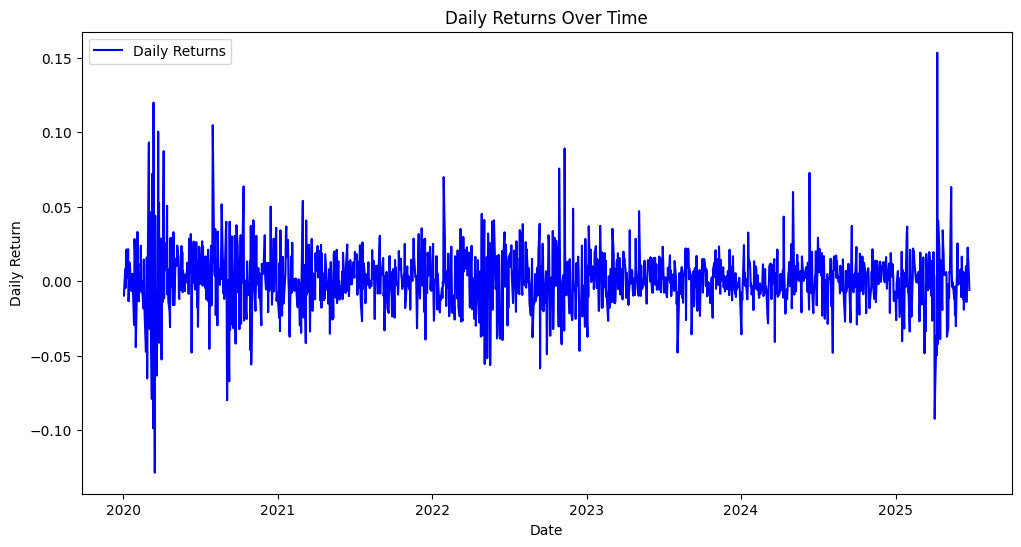

In [74]:
# Plot daily returns over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Daily Return"], label="Daily Returns", color="blue")
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

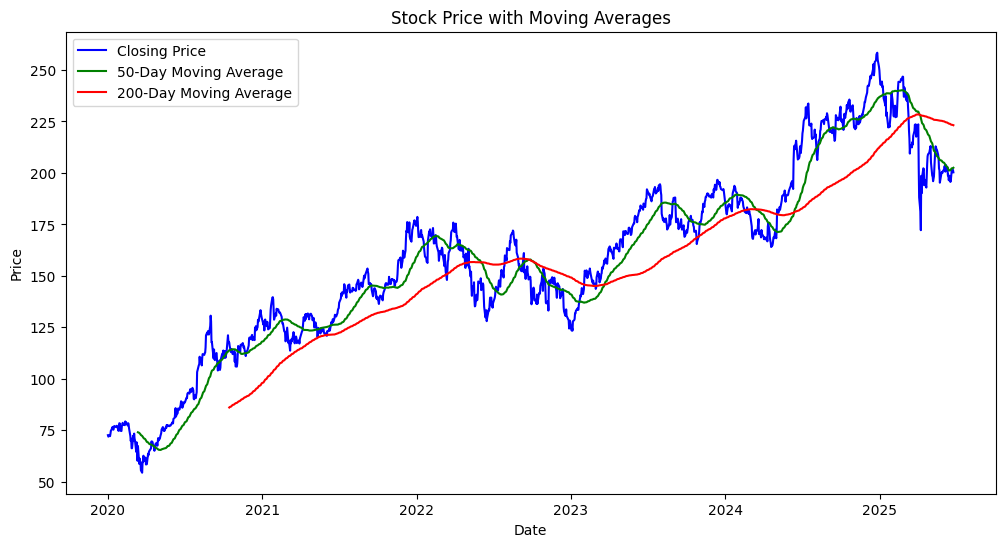

In [75]:
# Plot moving averages
data["50-day MA"] = data["Close"].rolling(window=50).mean()
data["200-day MA"] = data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.plot(data.index, data["50-day MA"], label="50-Day Moving Average", color="green")
plt.plot(data.index, data["200-day MA"], label="200-Day Moving Average", color="red")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [76]:
# Step 4: Correlation Analysis
# Retrieve another stock's data (e.g., SPY for S&P 500)
comparison_stock = "SPY"
comparison_data = yf.download(comparison_stock, start=start_date, end=end_date)

# Calculate daily returns for the comparison stock
comparison_data["Daily Return"] = comparison_data["Close"].pct_change()

# Calculate correlation
correlation = data["Daily Return"].corr(comparison_data["Daily Return"])
print(f"Correlation between {stock_ticker} and {comparison_stock}: {correlation}")

/tmp/ipython-input-2655289540.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  comparison_data = yf.download(comparison_stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Correlation between AAPL and SPY: 0.7938172721977931


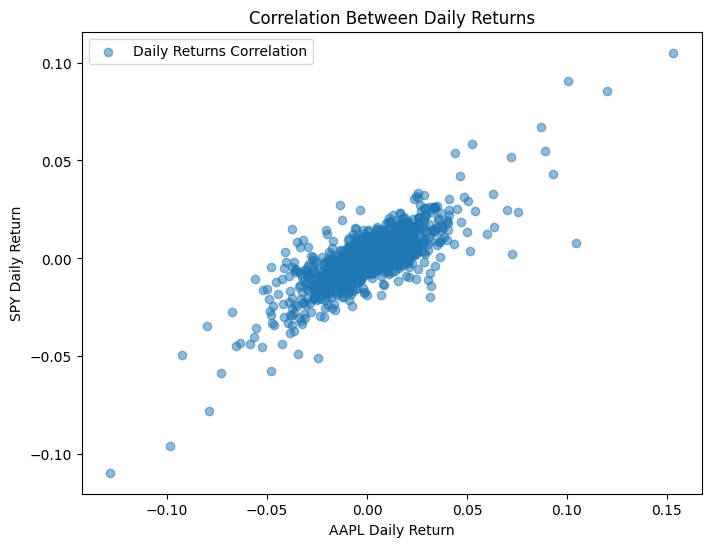

In [77]:
# Scatter plot for correlation
plt.figure(figsize=(8, 6))
plt.scatter(data["Daily Return"], comparison_data["Daily Return"], alpha=0.5, label="Daily Returns Correlation")
plt.title("Correlation Between Daily Returns")
plt.xlabel(f"{stock_ticker} Daily Return")
plt.ylabel(f"{comparison_stock} Daily Return")
plt.legend()
plt.show()

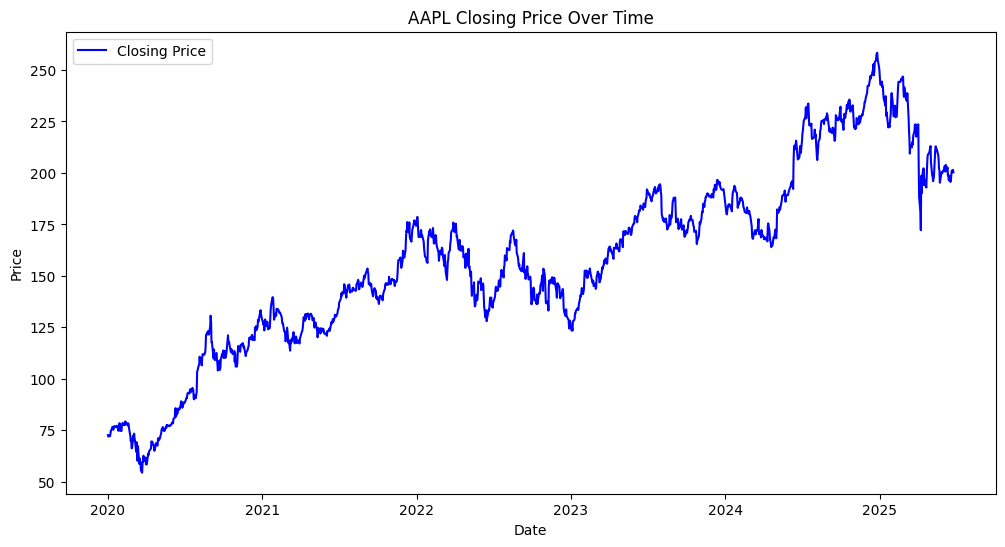

In [78]:
# Step 5: Visualization
# Line plot of closing price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.title(f"{stock_ticker} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

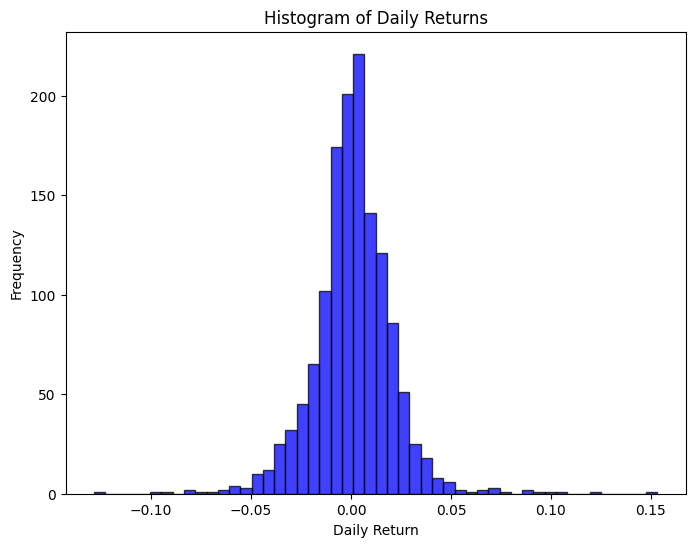

In [79]:
# Histogram of daily returns
plt.figure(figsize=(8, 6))
plt.hist(data["Daily Return"].dropna(), bins=50, alpha=0.75, color="blue", edgecolor="black")
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

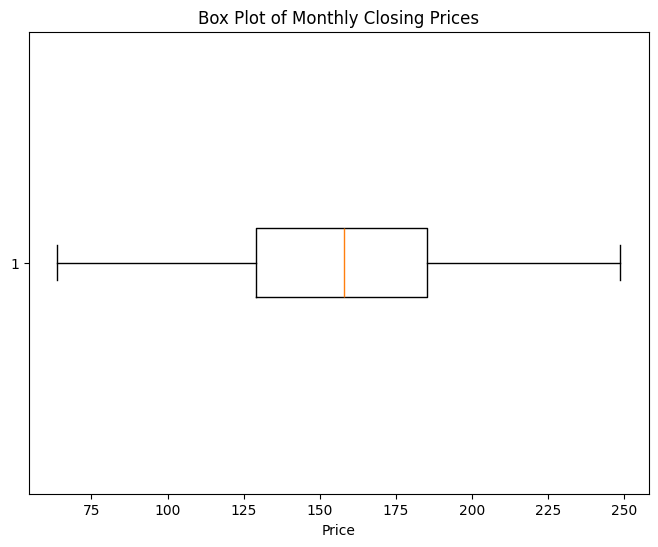

In [80]:
# Box plot for monthly closing prices
monthly_closing_price = data.groupby("Month")["Close"].mean()
plt.figure(figsize=(8, 6))
plt.boxplot(monthly_closing_price, vert=False)
plt.title("Box Plot of Monthly Closing Prices")
plt.xlabel("Price")
plt.show()

In [81]:
# Step 6: Save Results
# Save to CSV
output_file = "stock_analysis.csv"
data.to_csv(output_file)
print(f"Data saved to {output_file}")

Data saved to stock_analysis.csv
